<h1>Tugas FFT pada Gambar</h1>

<h4>Nama: Raditya Sebastian<br>
NIM:1306620042<br>
Kelas: Fisika A</h4>

Pada tugas ini saya mengaplikasikan fft pada gambar patrick dan dari situ saya memisahkan gambarnya agar mendapatkan spektrum magnitude dan spektrum phase ini disebut metode deconstruction. setelah itu membuat ulang lagi gambarnya ini disebut reconstruction. untuk tugas ini saya ingin menunjukan hasil magnitude dan phasenya dalam berwarna sebab dibuku hands-on python tidak menghasilkan warna. 

<h3>Library yang digunakan</h3>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<h3>Gambar Yang Digunakan</h3>

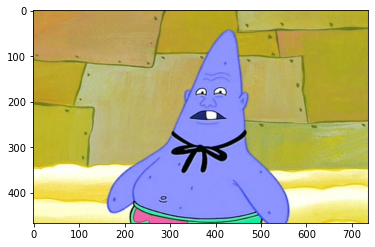

In [2]:
#Reading the picture
img = cv.imread('Patrick_Star.jpg',1)
#showing a picture
plt.imshow(img)


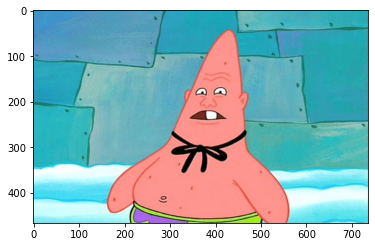

In [3]:
#karena warnanya BGR harus di konversi menjadi RGB
img_inv = cv.cvtColor(img, cv.COLOR_BGR2RGB)
Image.fromarray(img_inv).save('Raditya Sebastian_Patrick Star_rgb.jpg')
plt.imshow(img_inv)

<h3>Penarapan FFT</h3>

In [4]:
#FFT
f = np.fft.fft2(img_inv)
fshift = np.fft.fftshift(f)

<h2>Plotting Magnitud spektrum dan phase spektrum</h2>

<h3>Magnitude Spektrum</h3>

In [5]:
magnitude_spectrum = 20*np.log(np.abs(fshift))


<h3>Phase Spektrum</h3>

In [6]:
dft_shift = np.fft.fftshift(f)
phase_spectrum = np.angle(dft_shift)

<h3>Rekonstruksi Gambar</h3>

In [7]:
Patrick_reconstructed = np.fft.ifft2(f).real

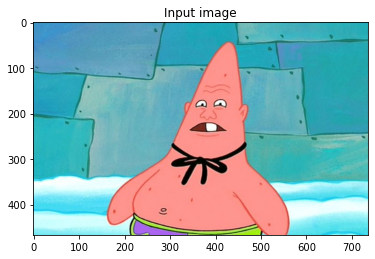

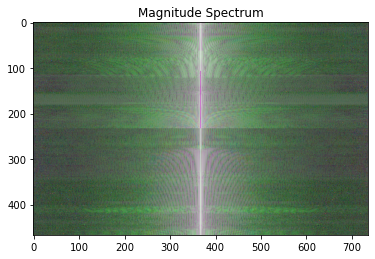

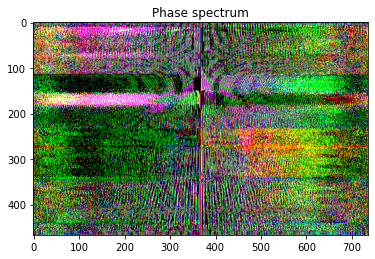

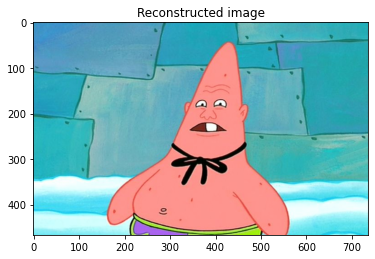

In [8]:
#Input Gambar
plt.subplot()
plt.title('Input image')
plt.imshow(img_inv)
plt.show()

#Spektrum Magnitude
plt.subplot()
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum.astype('uint8'))
plt.show()

#Spektrum phase
plt.subplot()
plt.title('Phase spectrum')
plt.imshow(phase_spectrum.astype('uint8'))
plt.show()

#Hasil Rekonstruksi gambar
plt.subplot()
plt.title('Reconstructed image')
plt.imshow(Patrick_reconstructed.astype('uint8'))
plt.show()


<h2>Menghasilkan threshold</h2>

untuk menghasilkan threshold saya mengeblur gambar

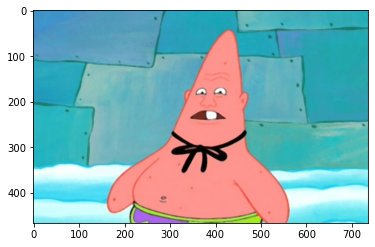

In [12]:
img_blur = cv.medianBlur(img_inv,5)
plt.imshow(img_blur)

<h3>Aplikasi threshold</h3>

<h2>Global Threshold</h2><br>
global thresholding adalah salah satu cara mengthreshold gambar tanpa memerlukan syarat

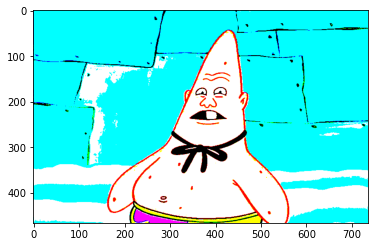

In [13]:
ret,th1 = cv.threshold(img_inv,127,255,cv.THRESH_BINARY)
plt.subplot()
plt.imshow(th1)


<h2>Adaptive Threshold</h2>
sebuah metode threshold yang hanya bisa dilakukan jika gambarnya dalam bentuk grayscale oleh karena itu saya melakukan konversi gambar terlebih dahulu. Setelah itu ada dua tipe dalam Adaptive threshold adaptive mean threshold dan adaptive Gaussian thresholding

In [75]:
#Proses Konversi greyscale
img_gray_1 = cv.imread('Raditya Sebastian_Patrick Star_rgb.jpg', cv.IMREAD_GRAYSCALE)

In [76]:
#Global Threshold
ret,Global_Thres = cv.threshold(img_gray_1,127,255,cv.THRESH_BINARY)
#Mean threshold
mean_thres = cv.adaptiveThreshold(img_gray_1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
#Gaussian Threshold
Gauss_thre =cv.adaptiveThreshold(img_gray_1,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

In [86]:
#Combinasi semua threshold

images_1 = [img_gray_1, Global_Thres, mean_thres, Gauss_thre]

# Don't do loops, m'kay?
output_1 = images_1[0]
for i, image in enumerate(images_1[1:]):
    output_1 = cv.addWeighted(output_1, 0.5, image, 0.5, 0)
    cv.imwrite(str(i) + '.png', output_1)

# Do linear blending using all images at once.
output_1 = (np.array(images_1) / len(images_1)).sum(axis=0).astype(np.uint8)
cv.imwrite('output.png', output_1)

True

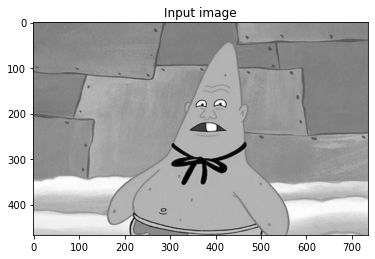

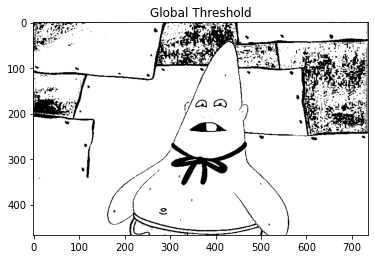

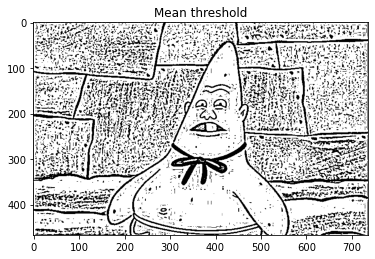

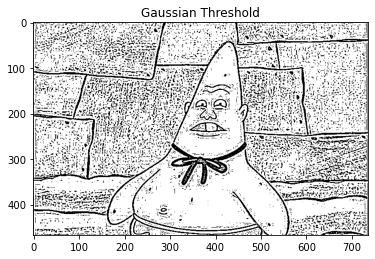

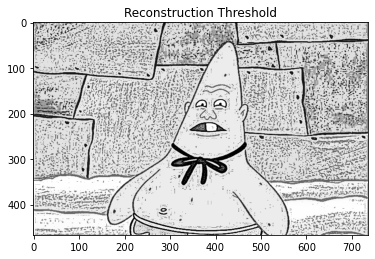

In [87]:
#Input Gambar
plt.subplot()
plt.title('Input image')
plt.imshow(img_gray_1,cmap='gray')
plt.show()

#Global Threshold
plt.subplot()
plt.title('Global Threshold')
plt.imshow(Global_Thres,cmap='gray')
plt.show()

#Mean threshold
plt.subplot()
plt.title('Mean threshold')
plt.imshow(mean_thres,cmap='gray')
plt.show()

#Gaussian Threshold
plt.subplot()
plt.title('Gaussian Threshold')
plt.imshow(Gauss_thre,cmap='gray')
plt.show()

#Reconstructed Threshold
plt.subplot()
plt.title('Reconstruction Threshold')
plt.imshow(output_1,cmap='gray')
plt.show()


<h2>Combining Image</h2>

Disini mengkombinasikan dua gambar menjadi satu menggunakan fft

<h2>Gambar kedua yang digunakan</h2>

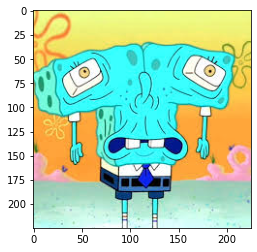

In [40]:
#Reading the picture
img_2 = cv.imread('Spongebob_2.jpg')
#showing a picture
plt.imshow(img_2)


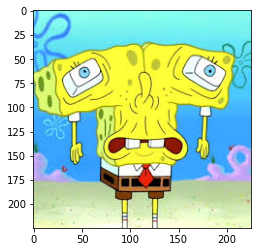

In [41]:
img_inv_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
plt.imshow(img_inv_2)

<h3>Penarapan FFT pada Gambar 2</h3>

In [42]:
#FFT
f_2 = np.fft.fft2(img_inv_2)
fshift_2 = np.fft.fftshift(f_2)

<h2>Plotting Magnitud spektrum dan phase spektrum pada Gambar 2</h2>

<h3>Magnitude Spektrum pada Gambar 2</h3>

In [43]:
magnitude_spectrum_2 = 20*np.log(np.abs(fshift_2))


<h3>Phase Spektrum pada Gambar 2</h3>

In [44]:
phase_spectrum_2  = np.angle(f_2)

<h3>Rekonstruksi Gambar pada Gambar 2</h3>

In [45]:
Spongebob_reconstructed = np.fft.ifft2(f_2).real

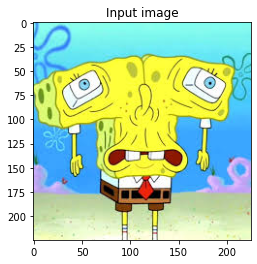

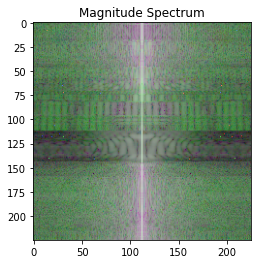

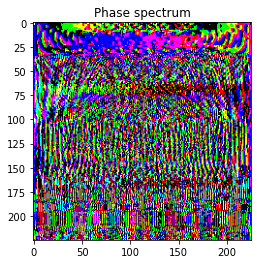

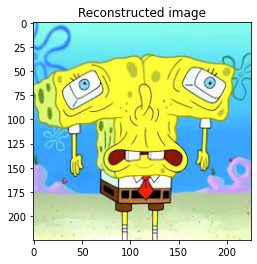

In [46]:
#Input Gambar
plt.subplot()
plt.title('Input image')
plt.imshow(img_inv_2)
plt.show()

#Spektrum Magnitude
plt.subplot()
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum_2.astype('uint8'))
plt.show()

#Spektrum phase
plt.subplot()
plt.title('Phase spectrum')
plt.imshow(phase_spectrum_2.astype('uint8'))
plt.show()

#Hasil Rekonstruksi gambar
plt.subplot()
plt.title('Reconstructed image')
plt.imshow(Spongebob_reconstructed.astype('uint8'))
plt.show()


<h2>Menghasilkan threshold pada Gambar 2</h2>

untuk menghasilkan threshold saya mengeblur gambar

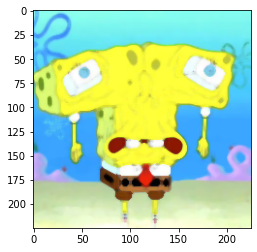

In [48]:
img_blur = cv.medianBlur(img_inv_2,5)
plt.imshow(img_blur)

<h3>Aplikasi threshold pada Gambar 2</h3>

<h2>Global Threshold pada Gambar 2</h2><br>
global thresholding adalah salah satu cara mengthreshold gambar tanpa memerlukan syarat

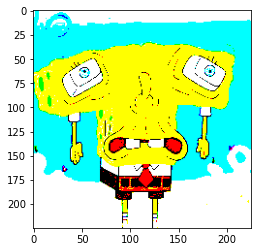

In [49]:
ret,th1 = cv.threshold(img_inv_2,127,255,cv.THRESH_BINARY)
plt.subplot()
plt.imshow(th1)


<h2>Adaptive Threshold pada Gambar 2</h2>
sebuah metode threshold yang hanya bisa dilakukan jika gambarnya dalam bentuk grayscale oleh karena itu saya melakukan konversi gambar terlebih dahulu. Setelah itu ada dua tipe dalam Adaptive threshold adaptive mean threshold dan adaptive Gaussian thresholding

In [51]:
#Proses Konversi greyscale
img_gray_2 = cv.imread('Spongebob_2.jpg', cv.IMREAD_GRAYSCALE)

In [53]:
#Global Threshold
ret,Global_Thres_2 = cv.threshold(img_gray_2,127,255,cv.THRESH_BINARY)
#Mean threshold
mean_thres_2 = cv.adaptiveThreshold(img_gray_2,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
#Gaussian Threshold
Gauss_thre_2 =cv.adaptiveThreshold(img_gray_2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

In [61]:
#Combinasi semua threshold

images = [img_gray_2, Global_Thres_2, mean_thres_2, Gauss_thre_2]

# Don't do loops, m'kay?
output = images[0]
for i, image in enumerate(images[1:]):
    output = cv.addWeighted(output, 0.5, image, 0.5, 0)
    cv.imwrite(str(i) + '.png', output)

# Do linear blending using all images at once.
output = (np.array(images) / len(images)).sum(axis=0).astype(np.uint8)
cv.imwrite('output_2.png', output)

True

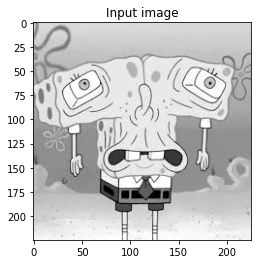

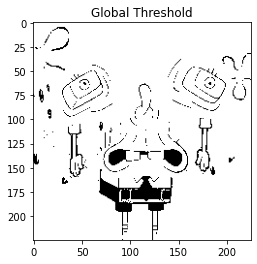

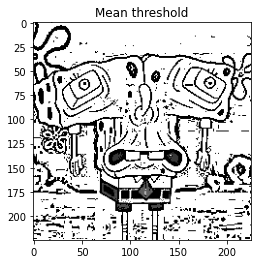

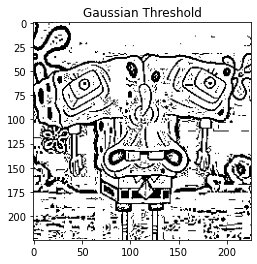

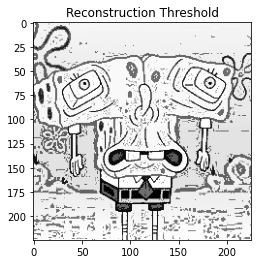

In [62]:
#Input Gambar
plt.subplot()
plt.title('Input image')
plt.imshow(img_gray_2,cmap='gray')
plt.show()

#Global Threshold
plt.subplot()
plt.title('Global Threshold')
plt.imshow(Global_Thres_2,cmap='gray')
plt.show()

#Mean threshold
plt.subplot()
plt.title('Mean threshold')
plt.imshow(mean_thres_2,cmap='gray')
plt.show()

#Gaussian Threshold
plt.subplot()
plt.title('Gaussian Threshold')
plt.imshow(Gauss_thre_2,cmap='gray')
plt.show()

#Reconstructed Threshold
plt.subplot()
plt.title('Reconstruction Threshold')
plt.imshow(output,cmap='gray')
plt.show()


<h2>Hasil Combinasi</h2>

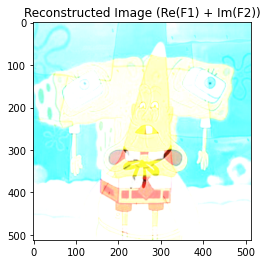

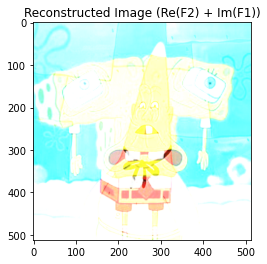

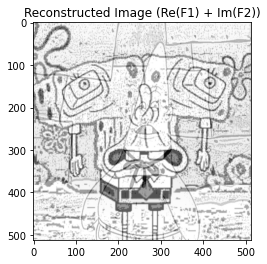

In [99]:
img_inv_resize=cv.resize(img_inv,(512,512))
img_inv_2_resize=cv.resize(img_inv_2,(512,512))
final_img = cv.add(img_inv_resize,img_inv_2_resize)
final_img_2 = cv.add(img_inv_2_resize,img_inv_resize)
#Combinasi img threshold
combination_threshold_patrick = cv.imread('output.png')
combination_threshold_spongebob = cv.imread('output_2.png')

threshold_resize = cv.resize(combination_threshold_patrick,(512,512))
threshold_resize_2 =cv.resize(combination_threshold_spongebob,(512,512))
final_img_3 = cv.addWeighted(threshold_resize, 0.35, threshold_resize_2, 0.7, 0.0)
#Plotting
plt.subplot()
plt.title('Reconstructed Image (Re(F1) + Im(F2))')
plt.imshow(final_img)
plt.show()
plt.subplot()
plt.title('Reconstructed Image (Re(F2) + Im(F1))')
plt.imshow(final_img_2)
plt.show()
plt.subplot()
plt.title('Reconstructed Image (Re(F1) + Im(F2))')
plt.imshow(final_img_3)
plt.show()
